# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [2]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [3]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [4]:
import pandas as pd  #data analysis an dmanipulation tool- pandas
import plotly.express as px # for data visualization - plotly
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet # for data forecasting - fbprophet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 148 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637401 sha256=4d63f1cb047b7fb017082393bb57d22682479daf28d57507c866f91e4d493e0d
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the 

In [5]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [6]:
df = pd.read_csv('AMZN.csv')

In [7]:
#read_csv function from pandas

In [8]:
df #displays the data. We are going to use "close" column for our analysis

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-02,167.654999,167.945999,165.850006,166.574005,166.574005,67078000
1,2021-08-03,167.035995,169.550003,164.988495,168.311996,168.311996,83146000
2,2021-08-04,168.967499,169.444000,167.278000,167.735992,167.735992,43678000
3,2021-08-05,167.811005,169.449997,167.046005,168.799500,168.799500,48670000
4,2021-08-06,168.750000,168.750000,166.451996,167.246994,167.246994,52752000
...,...,...,...,...,...,...,...
246,2022-07-25,122.699997,123.639999,120.029999,121.139999,121.139999,50221300
247,2022-07-26,115.790001,118.150002,114.529999,114.809998,114.809998,67075100
248,2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000
249,2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [10]:
df.describe()  #describe function is an extremely useful function for the financial analysis as it gives us the stratestical analysis

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,151.017002,153.119885,148.749387,150.896755,150.896755,7.273105e+07
std,23.535819,23.199941,23.770664,23.423447,23.423447,3.128490e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,3.360600e+07
25%,135.791748,138.949997,132.991249,135.482247,135.482247,5.360780e+07
50%,160.595001,162.705002,159.552994,161.214005,161.214005,6.472600e+07
75%,168.586502,170.792252,166.592254,169.047005,169.047005,8.318800e+07
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [11]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [12]:
#analysing the price of tesla
px.area(df,x='Date', y='Close')

In [13]:
px.line(df,x='Date', y='Close')

In [14]:
px.area(df,x='Date', y='Volume')

In [15]:
px.bar(df,y='Volume')

In [16]:
px.box(df,y='Close')

# Understanding Facebook Prophet

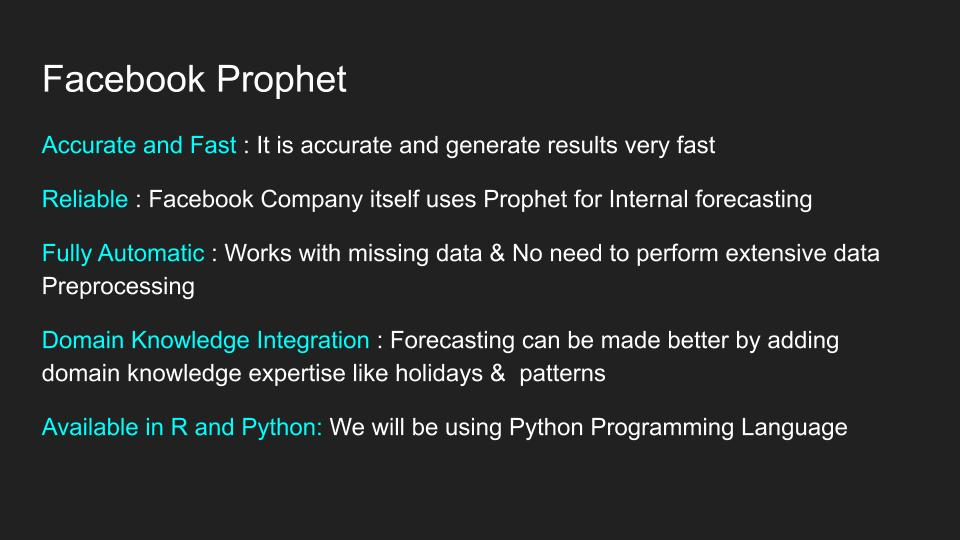

## Data Preperation

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-02,167.654999,167.945999,165.850006,166.574005,166.574005,67078000
1,2021-08-03,167.035995,169.550003,164.988495,168.311996,168.311996,83146000
2,2021-08-04,168.967499,169.444000,167.278000,167.735992,167.735992,43678000
3,2021-08-05,167.811005,169.449997,167.046005,168.799500,168.799500,48670000
4,2021-08-06,168.750000,168.750000,166.451996,167.246994,167.246994,52752000
...,...,...,...,...,...,...,...
246,2022-07-25,122.699997,123.639999,120.029999,121.139999,121.139999,50221300
247,2022-07-26,115.790001,118.150002,114.529999,114.809998,114.809998,67075100
248,2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000
249,2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500


In [18]:
columns =['Date',"Close"] 
ndf = pd.DataFrame(df,columns=columns)

In [19]:
ndf

,Date,Close
0,2021-08-02,166.574005
1,2021-08-03,168.311996
2,2021-08-04,167.735992
3,2021-08-05,168.799500
4,2021-08-06,167.246994
...,...,...
246,2022-07-25,121.139999
247,2022-07-26,114.809998
248,2022-07-27,120.970001
249,2022-07-28,122.279999


In [20]:
#fbprophet doesnt understand Date and column. It understands ds and y. So we renmae it.
prophet_df =ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [21]:
prophet_df

,ds,y
0,2021-08-02,166.574005
1,2021-08-03,168.311996
2,2021-08-04,167.735992
3,2021-08-05,168.799500
4,2021-08-06,167.246994
...,...,...
246,2022-07-25,121.139999
247,2022-07-26,114.809998
248,2022-07-27,120.970001
249,2022-07-28,122.279999


## Creating Facebook Prophet Model

In [22]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [23]:
future = m.make_future_dataframe(periods=30) #since we have our data in days, 
#30 represents 30 days into the future
forecast_df = m.predict(future)

In [24]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-02,167.233847,155.456326,180.274469,167.233847,167.233847,0.184766,0.184766,0.184766,0.184766,0.184766,0.184766,0.0,0.0,0.0,167.418613
1,2021-08-03,167.270929,155.848793,179.277839,167.270929,167.270929,0.156417,0.156417,0.156417,0.156417,0.156417,0.156417,0.0,0.0,0.0,167.427346
2,2021-08-04,167.308011,154.934658,180.001977,167.308011,167.308011,0.361777,0.361777,0.361777,0.361777,0.361777,0.361777,0.0,0.0,0.0,167.669788
3,2021-08-05,167.345093,154.631502,178.832977,167.345093,167.345093,0.179261,0.179261,0.179261,0.179261,0.179261,0.179261,0.0,0.0,0.0,167.524354
4,2021-08-06,167.382176,155.193313,180.246717,167.382176,167.382176,0.088702,0.088702,0.088702,0.088702,0.088702,0.088702,0.0,0.0,0.0,167.470877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2022-08-24,99.202232,87.485912,111.467110,98.616352,99.878772,0.361777,0.361777,0.361777,0.361777,0.361777,0.361777,0.0,0.0,0.0,99.564008
277,2022-08-25,98.929019,86.890256,112.030175,98.297312,99.643290,0.179261,0.179261,0.179261,0.179261,0.179261,0.179261,0.0,0.0,0.0,99.108280
278,2022-08-26,98.655806,86.641026,110.480291,97.979231,99.409219,0.088702,0.088702,0.088702,0.088702,0.088702,0.088702,0.0,0.0,0.0,98.744508
279,2022-08-27,98.382594,86.035016,110.954237,97.659061,99.188513,-0.485461,-0.485461,-0.485461,-0.485461,-0.485461,-0.485461,0.0,0.0,0.0,97.897132


In [25]:
#yhat-- is the predicted value
#so lets use plotly express to look at the yhat column


In [26]:
px.line(forecast_df,x='ds',y='yhat')
#notice the linearly increasing line. This means that fbprophet is predicting that there is going to 
#be a steady increase in the stocks of tesla for the coming 30 days

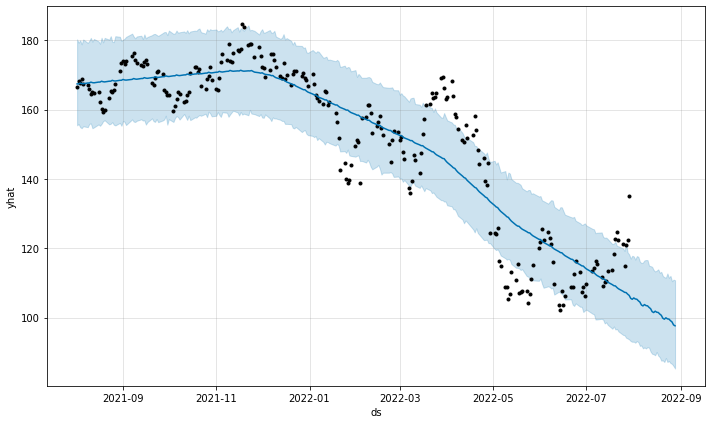

In [27]:
figure= m.plot(forecast_df,xlabel='ds',ylabel='yhat') 
#forecast of the price. This helps the investors buy/sell according to the trends

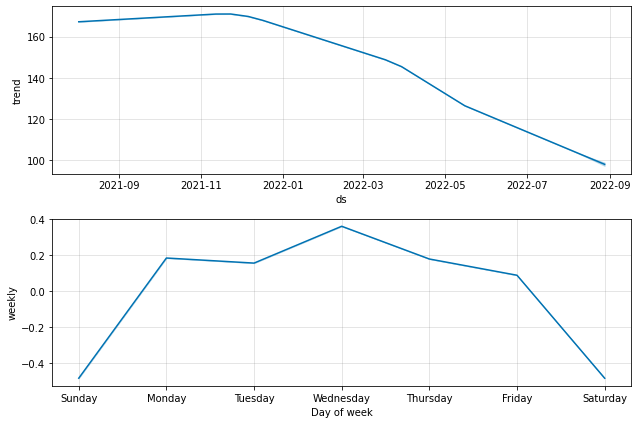

In [28]:
#visualising trends
figure2= m.plot_components(forecast_df)

##Downloading the Forecast data

In [29]:
from google.colab import files
forecast_df.to_csv('FORECAST.csv')
files.download('FORECAST.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# so far, we have forecasted the data 30 days into the future. 
#Now, lets go to the google sheets and understand its performance.